In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import math
from functools import reduce

from sklearn.preprocessing import scale
# import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


%matplotlib inline

import numpy as np
import pandas as pd

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import os
import pandas_datareader.data as web

## Importing SP 500 Index

 - https://finance.yahoo.com/quote/%5EGSPC/

In [18]:
data = web.get_data_yahoo('^GSPC','01/02/1970',interval='m')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1970-01-01,94.250000,84.419998,92.059998,85.019997,221090000,85.019997
1970-02-01,90.330002,84.639999,85.019997,89.500000,228380000,89.500000
1970-03-01,91.070000,86.190002,89.500000,89.629997,212880000,89.629997
1970-04-01,90.699997,79.309998,89.629997,81.519997,223120000,81.519997
1970-05-01,82.320000,68.610001,81.519997,76.550003,258220000,76.550003


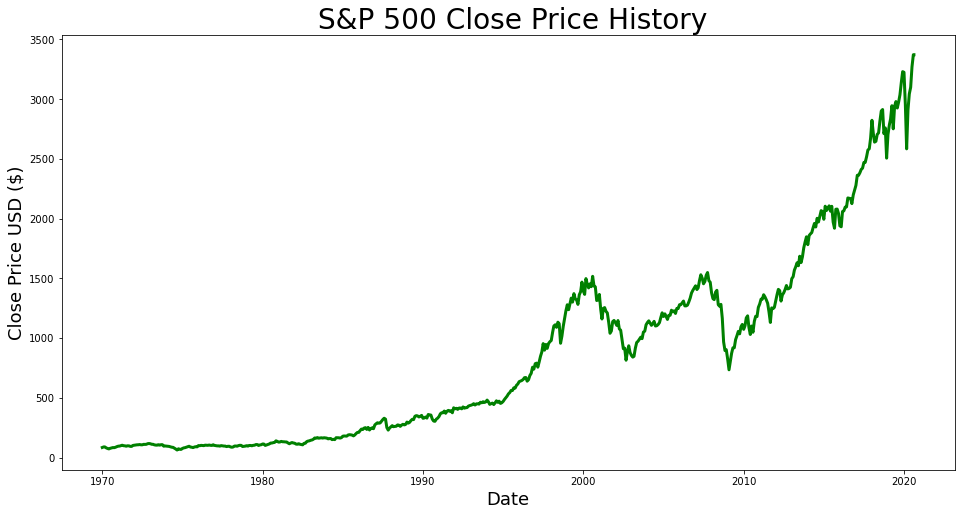

In [19]:
plt.figure(figsize=(16,8))
plt.title(' S&P 500 Close Price History',fontsize=28)
plt.plot(data['Close'], c = 'g', linewidth=3.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
data = data['Close']

In [21]:
data = data.reset_index()
data.head()

,Date,Close
0,1970-01-01,85.019997
1,1970-02-01,89.500000
2,1970-03-01,89.629997
3,1970-04-01,81.519997
4,1970-05-01,76.550003


## Importing US Indicators by months

In [22]:
Unemployment_Rate = web.DataReader('UNRATE', 'fred', start = 1970)
Unemployment_Rate.rename(columns = {'UNRATE':'Unemployment_Rate'},inplace=True)
Unemployment_Rate.shape

(607, 1)

In [23]:
Unemployment_Persons = web.DataReader('UNEMPLOY', 'fred', start = 1970)
Unemployment_Persons.rename(columns = {'UNEMPLOY':'Unemployment_Persons'},inplace=True)
Unemployment_Persons.shape

(607, 1)

In [24]:
Employment_Persons = web.DataReader('CE16OV', 'fred', start = 1970)
Employment_Persons.rename(columns = {'CE16OV':'Employment_Persons'},inplace=True)
Employment_Persons.shape

(607, 1)

In [25]:
Year_Treasury_10 = web.DataReader('GS10', 'fred', start = 1970)
Year_Treasury_10.rename(columns = {'GS10':'Year_Treasury_10'},inplace=True)
Year_Treasury_10.shape

(607, 1)

In [26]:
Funds_rate = web.DataReader('FEDFUNDS', 'fred', start = 1970)
Funds_rate.rename(columns = {'FEDFUNDS':'Funds_rate'},inplace=True)
Funds_rate.shape

(607, 1)

In [27]:
Interest_Rates = web.DataReader('INTDSRUSM193N', 'fred', start = 1970)
Interest_Rates.rename(columns = {'INTDSRUSM193N':'Interest_Rates'},inplace=True)
Interest_Rates.shape

(606, 1)

In [28]:
CPI = web.DataReader('CPIAUCSL', 'fred', start = 1970)
CPI.rename(columns = {'CPIAUCSL':'CPI'},inplace=True)
CPI.shape

(607, 1)

In [29]:
M2 = web.DataReader('M2SL', 'fred', start = 1970)
M2.rename(columns = {'M2SL':'M2'},inplace=True)
M2.shape

(607, 1)

In [30]:
M1 = web.DataReader('M1SL', 'fred', start = 1970)
M1.rename(columns = {'M1SL':'M1'},inplace=True)
M1.shape

(607, 1)

In [31]:
M3 = web.DataReader('MABMM301USM189S', 'fred', start = 1970)
M3.rename(columns = {'MABMM301USM189S':'M3'},inplace=True)
M3.shape

(606, 1)

In [32]:
All_Employees = web.DataReader('PAYEMS', 'fred', start = 1970)
All_Employees.rename(columns = {'PAYEMS':'All_Employees'},inplace=True)
All_Employees.shape

(607, 1)

In [33]:
Industrial_Production_Index = web.DataReader('INDPRO', 'fred', start = 1970)
Industrial_Production_Index.rename(columns = {'INDPRO':'Industrial_Production_Index'},inplace=True)
Industrial_Production_Index.shape

(607, 1)

In [34]:
Treasure_bill_3M = web.DataReader('TB3MS', 'fred', start = 1970)
Treasure_bill_3M.rename(columns = {'TB3MS':'Treasure_bill_3M'},inplace=True)
Treasure_bill_3M.shape

(607, 1)

In [35]:
Personal_savings_rate = web.DataReader('PSAVERT', 'fred', start = 1970)
Personal_savings_rate.rename(columns = {'PSAVERT':'Personal_savings_rate'},inplace=True)
Personal_savings_rate.shape

(606, 1)

In [36]:
Personal_Consumption_Expenditures = web.DataReader('PCE', 'fred', start = 1970)
Personal_Consumption_Expenditures.rename(columns = {'PCE':'Personal_Consumption_Expenditures'},inplace=True)
Personal_Consumption_Expenditures.shape

(606, 1)

In [37]:
Housing_Starts = web.DataReader('HOUST', 'fred', start = 1970)
Housing_Starts.rename(columns = {'HOUST':'Housing_Starts'},inplace=True)
Housing_Starts.shape

(606, 1)

In [38]:
Labor_Force_Participation_Rate = web.DataReader('CIVPART', 'fred', start = 1970)
Labor_Force_Participation_Rate.rename(columns = {'CIVPART':'Labor_Force_Participation_Rate'},inplace=True)
Labor_Force_Participation_Rate.shape

(607, 1)

In [39]:
# Consumer_sentiment = web.DataReader('UMCSENT', 'fred', start = 1970)
# Consumer_sentiment.rename(columns = {'UMCSENT':'Consumer_sentiment'},inplace=True)
# Consumer_sentiment.shape

In [40]:
Commercial_and_Industrial_Loans = web.DataReader('BUSLOANS', 'fred', start = 1970)
Commercial_and_Industrial_Loans.rename(columns = {'BUSLOANS':'Commercial_and_Industrial_Loans'},inplace=True)
Commercial_and_Industrial_Loans.shape

(607, 1)

In [41]:
Real_Disposable_Personal_Income = web.DataReader('DSPIC96', 'fred', start = 1970)
Real_Disposable_Personal_Income.rename(columns = {'DSPIC96':'Real_Disposable_Personal_Income'},inplace=True)
Real_Disposable_Personal_Income.shape

(606, 1)

In [42]:
Bank_Prime_Loan_Rate = web.DataReader('MPRIME', 'fred', start = 1970)
Bank_Prime_Loan_Rate.rename(columns = {'MPRIME':'Bank_Prime_Loan_Rate'},inplace=True)
Bank_Prime_Loan_Rate.shape

(607, 1)

In [43]:
New_Private_Housing_Building_Permits = web.DataReader('PERMIT', 'fred', start = 1970)
New_Private_Housing_Building_Permits.rename(columns = {'PERMIT':'New_Private_Housing_Building_Permits'},inplace=True)
New_Private_Housing_Building_Permits.shape

(606, 1)

In [44]:
Motor_Vehicle_Retail_Sales = web.DataReader('HTRUCKSSAAR', 'fred', start = 1970)
Motor_Vehicle_Retail_Sales.rename(columns = {'HTRUCKSSAAR':'Motor_Vehicle_Retail_Sales'},inplace=True)
Motor_Vehicle_Retail_Sales.shape

(607, 1)

In [45]:
Currency_in_Circulation = web.DataReader('CURRCIR', 'fred', start = 1970)
Currency_in_Circulation.rename(columns = {'CURRCIR':'Currency_in_Circulation'},inplace=True)
Currency_in_Circulation.shape

(607, 1)

In [46]:
WTI = web.DataReader('WTISPLC', 'fred', start = 1970)
WTI.rename(columns = {'WTISPLC':'WTI'},inplace=True)
WTI.shape

(607, 1)

In [47]:
Population = web.DataReader('POPTHM', 'fred', start = 1970)
Population.rename(columns = {'POPTHM':'Population'},inplace=True)
Population.shape

(606, 1)

In [48]:
Bank_Credit = web.DataReader('LOANINV', 'fred', start = 1970)
Bank_Credit.rename(columns = {'LOANINV':'Bank_Credit'},inplace=True)
Bank_Credit.shape

(607, 1)

In [49]:
Leading_Indicators_OECD = web.DataReader('USALORSGPNOSTSAM', 'fred', start = 1970)
Leading_Indicators_OECD.rename(columns = {'USALORSGPNOSTSAM':'Leading_Indicators_OECD'},inplace=True)
Leading_Indicators_OECD.shape

(605, 1)

In [50]:
Personal_Saving = web.DataReader('PMSAVE', 'fred', start = 1970)
Personal_Saving.rename(columns = {'PMSAVE':'Personal_Saving'},inplace=True)
Personal_Saving.shape

(606, 1)

In [51]:
Demand_Deposits = web.DataReader('DEMDEPSL', 'fred', start = 1970)
Demand_Deposits.rename(columns = {'DEMDEPSL':'Demand_Deposits'},inplace=True)
Demand_Deposits.shape

(607, 1)

## Merging into one dataset

In [52]:
df = data.merge(Unemployment_Rate, how='left', 
                            left_on='Date', right_on='DATE').merge(Unemployment_Persons, how='left', 
                            left_on='Date', right_on='DATE').merge(Employment_Persons, how='left',
                            left_on='Date', right_on='DATE').merge(Year_Treasury_10, how='left',
                            left_on='Date', right_on='DATE').merge(Funds_rate, how='left',
                            left_on='Date', right_on='DATE').merge(Interest_Rates, how='left',
                            left_on='Date', right_on='DATE').merge(CPI, how='left', 
                            left_on='Date', right_on='DATE').merge(M2, how='left',
                            left_on='Date', right_on='DATE').merge(M1, how='left',
                            left_on='Date', right_on='DATE').merge(M3, how='left',
                            left_on='Date', right_on='DATE').merge(All_Employees, how='left',                                                                   
                            left_on='Date', right_on='DATE').merge(Industrial_Production_Index, how='left', 
                            left_on='Date', right_on='DATE').merge(Treasure_bill_3M, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_savings_rate, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_Consumption_Expenditures, how='left',
                            left_on='Date', right_on='DATE').merge(Housing_Starts, how='left',
                            left_on='Date', right_on='DATE').merge(Labor_Force_Participation_Rate, how='left', 
                            left_on='Date', right_on='DATE').merge(Commercial_and_Industrial_Loans, how='left',
                            left_on='Date', right_on='DATE').merge(Real_Disposable_Personal_Income, how='left',
                            left_on='Date', right_on='DATE').merge(Bank_Prime_Loan_Rate, how='left',                                                                     
                            left_on='Date', right_on='DATE').merge(New_Private_Housing_Building_Permits, how='left', 
                            left_on='Date', right_on='DATE').merge(Motor_Vehicle_Retail_Sales, how='left',
                            left_on='Date', right_on='DATE').merge(Currency_in_Circulation, how='left',
                            left_on='Date', right_on='DATE').merge(WTI, how='left',
                            left_on='Date', right_on='DATE').merge(Population, how='left',
                            left_on='Date', right_on='DATE').merge(Bank_Credit, how='left',
                            left_on='Date', right_on='DATE').merge(Leading_Indicators_OECD, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_Saving, how='left',
                            left_on='Date', right_on='DATE').merge(Demand_Deposits, how='left',
                            left_on='Date', right_on='DATE')    

In [53]:
df.head()

,Date,Close,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,1970-01-01,85.019997,3.9,3201.0,78780.0,7.79,8.98,6.0,37.9,589.6,...,8.50,1062.0,0.332,52.737,3.35,203929.0,398.5684,99.381221,86.3,159.3
1,1970-02-01,89.500000,4.2,3453.0,78698.0,7.24,8.98,6.0,38.1,586.3,...,8.50,1118.0,0.379,52.112,3.35,204082.0,396.2011,99.156183,86.1,158.0
2,1970-03-01,89.629997,4.4,3635.0,78863.0,7.07,7.76,6.0,38.3,587.3,...,8.39,1132.0,0.351,52.411,3.35,204246.0,398.7779,98.963485,92.4,158.5
3,1970-04-01,81.519997,4.6,3797.0,78930.0,7.39,8.10,6.0,38.5,588.4,...,8.00,1224.0,0.347,52.867,3.35,204504.0,402.5058,98.801924,100.3,159.3
4,1970-05-01,76.550003,4.8,3919.0,78564.0,7.91,7.94,6.0,38.6,591.5,...,8.00,1328.0,0.336,53.490,3.35,204719.0,402.4179,98.666184,93.2,159.4


In [54]:
# df.to_excel("output10.xlsx")

## Data cleaning

In [55]:
df.isnull().sum()

Date                                    0
Close                                   0
Unemployment_Rate                       2
Unemployment_Persons                    2
Employment_Persons                      2
Year_Treasury_10                        2
Funds_rate                              2
Interest_Rates                          3
CPI                                     2
M2                                      2
M1                                      2
M3                                      3
All_Employees                           2
Industrial_Production_Index             2
Treasure_bill_3M                        2
Personal_savings_rate                   3
Personal_Consumption_Expenditures       3
Housing_Starts                          3
Labor_Force_Participation_Rate          2
Commercial_and_Industrial_Loans         2
Real_Disposable_Personal_Income         3
Bank_Prime_Loan_Rate                    2
New_Private_Housing_Building_Permits    3
Motor_Vehicle_Retail_Sales        

In [56]:
df.shape

(609, 31)

In [57]:
df = df.iloc[0:605]

In [58]:
df.isnull().sum()

Date                                    0
Close                                   0
Unemployment_Rate                       0
Unemployment_Persons                    0
Employment_Persons                      0
Year_Treasury_10                        0
Funds_rate                              0
Interest_Rates                          0
CPI                                     0
M2                                      0
M1                                      0
M3                                      0
All_Employees                           0
Industrial_Production_Index             0
Treasure_bill_3M                        0
Personal_savings_rate                   0
Personal_Consumption_Expenditures       0
Housing_Starts                          0
Labor_Force_Participation_Rate          0
Commercial_and_Industrial_Loans         0
Real_Disposable_Personal_Income         0
Bank_Prime_Loan_Rate                    0
New_Private_Housing_Building_Permits    0
Motor_Vehicle_Retail_Sales        

In [59]:
# df.to_excel("output10.xlsx")

## Correlation analysis

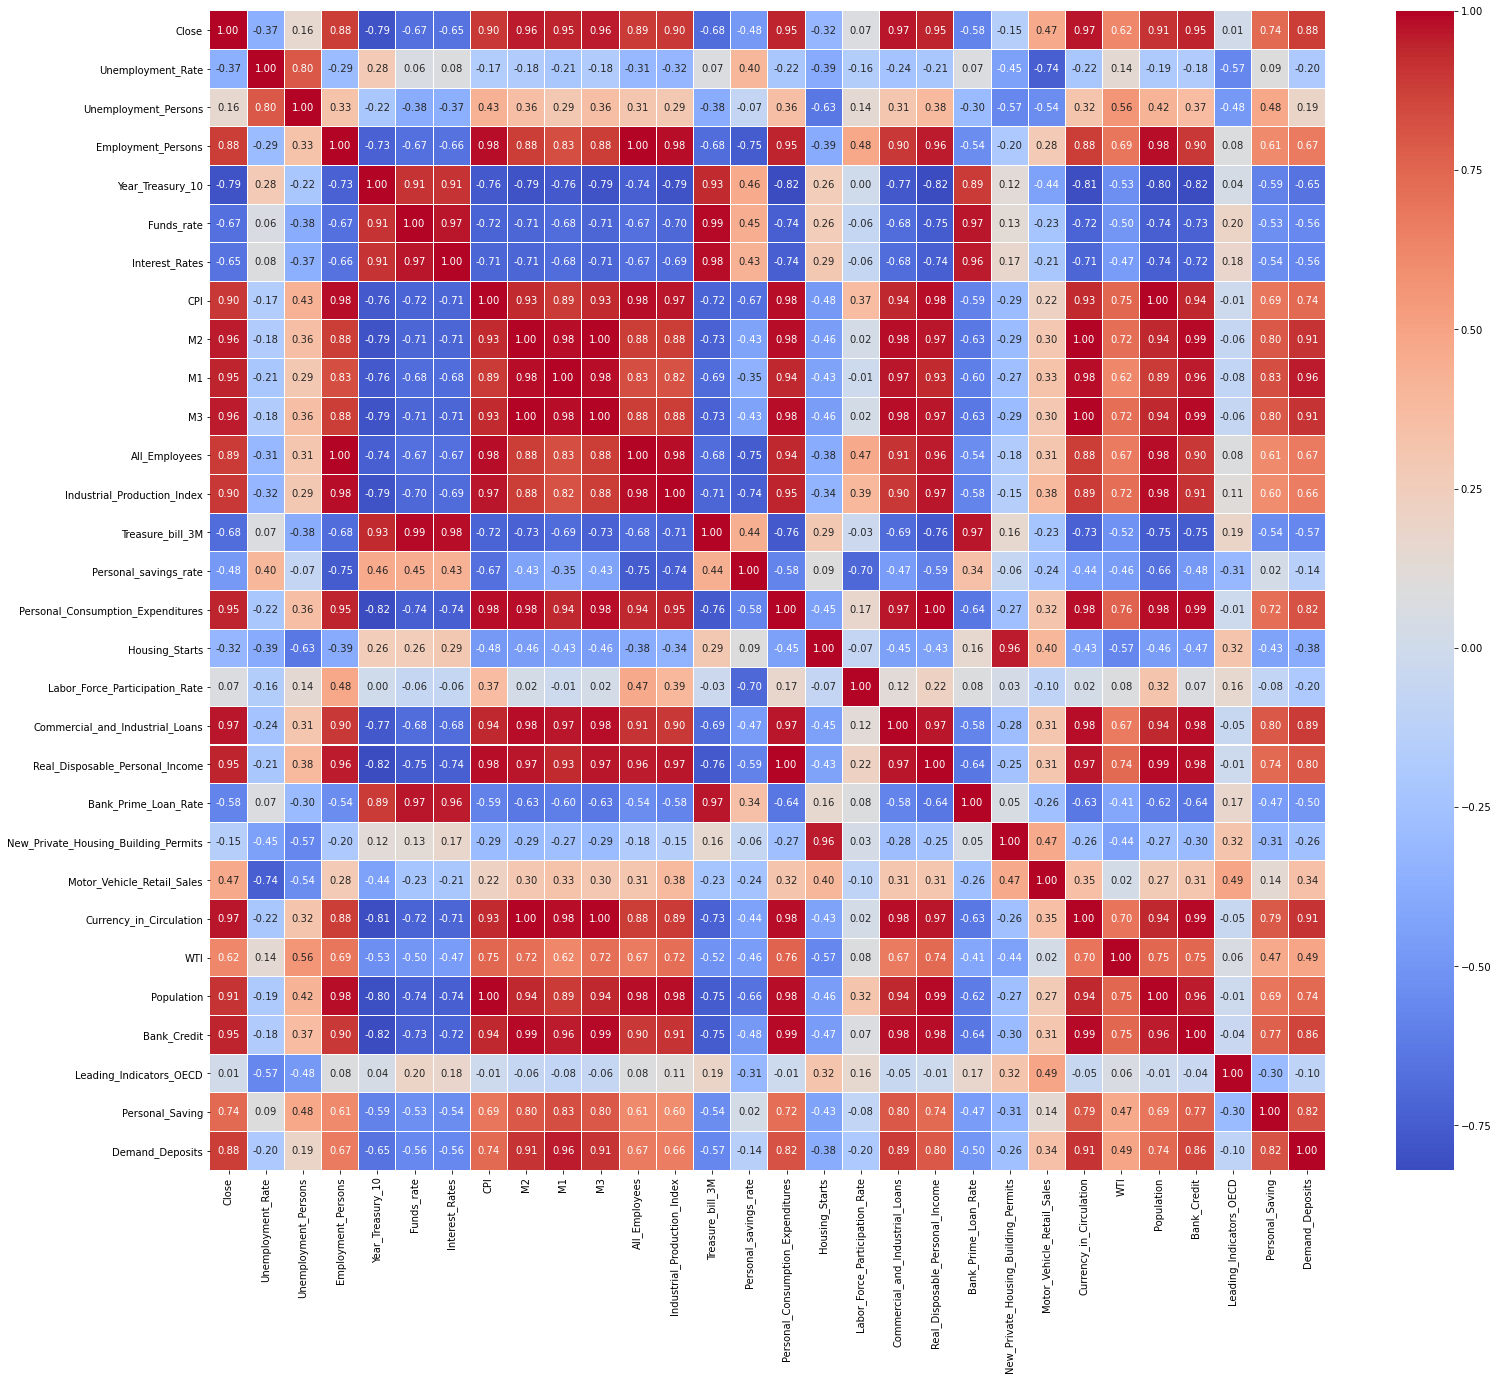

In [60]:
f, ax = plt.subplots(figsize=(25, 20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

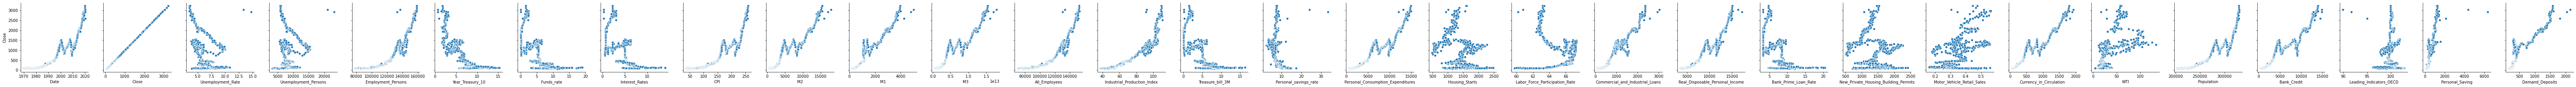

In [61]:
sns.pairplot(data=df, x_vars=df.columns, y_vars = 'Close', height=3)

In [62]:
# for col in df.columns:
#     plt.scatter(x = col, y = "Close", data=df)
#     plt.xlabel(col)
#     plt.ylabel('Close')
#     plt.show()

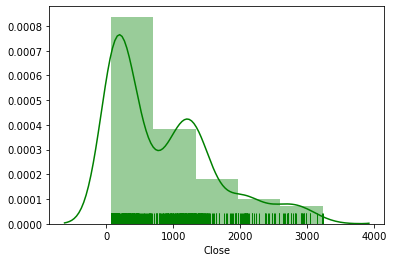

In [133]:
sns.distplot(df['Close'], 
             bins=5,
             kde=True, 
             rug=True, 
             color='green')

## Data standartization

In [64]:
df.head()

,Date,Close,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,1970-01-01,85.019997,3.9,3201.0,78780.0,7.79,8.98,6.0,37.9,589.6,...,8.50,1062.0,0.332,52.737,3.35,203929.0,398.5684,99.381221,86.3,159.3
1,1970-02-01,89.500000,4.2,3453.0,78698.0,7.24,8.98,6.0,38.1,586.3,...,8.50,1118.0,0.379,52.112,3.35,204082.0,396.2011,99.156183,86.1,158.0
2,1970-03-01,89.629997,4.4,3635.0,78863.0,7.07,7.76,6.0,38.3,587.3,...,8.39,1132.0,0.351,52.411,3.35,204246.0,398.7779,98.963485,92.4,158.5
3,1970-04-01,81.519997,4.6,3797.0,78930.0,7.39,8.10,6.0,38.5,588.4,...,8.00,1224.0,0.347,52.867,3.35,204504.0,402.5058,98.801924,100.3,159.3
4,1970-05-01,76.550003,4.8,3919.0,78564.0,7.91,7.94,6.0,38.6,591.5,...,8.00,1328.0,0.336,53.490,3.35,204719.0,402.4179,98.666184,93.2,159.4


In [65]:
columns=df.drop(columns = ['Date']).columns

In [66]:
df1 = df.drop(columns = ['Date'])

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [68]:
df1 = scaler.transform(df1)

In [69]:
pd.DataFrame(df1, columns=columns).describe()

,Close,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
count,605.000000,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,...,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,6.050000e+02,605.000000,6.050000e+02,605.000000,6.050000e+02
mean,0.000000,2.348902e-16,1.879121e-16,-1.879121e-16,0.000000,4.697803e-17,4.697803e-17,9.395606e-17,3.758243e-16,4.697803e-17,...,-1.409341e-16,1.644231e-16,-2.114011e-16,4.697803e-17,0.000000,-5.637364e-16,0.000000,1.216144e-14,0.000000,4.697803e-17
std,1.000827,1.000827e+00,1.000827e+00,1.000827e+00,1.000827,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,...,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827,1.000827e+00,1.000827,1.000827e+00,1.000827,1.000827e+00
min,-0.993082,-1.638855e+00,-1.921926e+00,-1.882888e+00,-1.829177,-1.293874e+00,-1.484557e+00,-1.662827e+00,-1.114166e+00,-1.044701e+00,...,-1.226570e+00,-2.159071e+00,-2.077474e+00,-1.037380e+00,-1.180424,-1.628473e+00,-1.105829,-7.556044e+00,-0.907517,-7.902689e-01
25%,-0.900603,-7.339200e-01,-6.046132e-01,-9.363225e-01,-0.778098,-8.600493e-01,-8.382845e-01,-7.633202e-01,-8.052891e-01,-7.977310e-01,...,-7.933562e-01,-7.024871e-01,-6.934297e-01,-8.371543e-01,-0.696358,-8.896157e-01,-0.861600,-4.333878e-01,-0.508646,-5.585784e-01
50%,-0.433281,-2.512878e-01,-1.830731e-01,1.368129e-01,-0.023145,2.546429e-02,5.033980e-02,4.142254e-02,-4.011407e-01,-1.664742e-01,...,8.688141e-04,1.717894e-02,-9.722622e-02,-3.190270e-01,-0.312041,-3.276692e-02,-0.387633,1.424742e-02,-0.250965,-3.864876e-01
75%,0.580331,6.536475e-01,2.569696e-01,8.199908e-01,0.569104,5.588140e-01,4.930362e-01,9.137035e-01,5.582946e-01,1.334178e-01,...,4.340825e-01,7.023404e-01,6.906141e-01,5.326104e-01,0.501099,9.232962e-01,0.941932,5.890306e-01,0.088028,-1.635693e-01
max,3.062598,5.117995e+00,6.073257e+00,1.623283e+00,2.941351,3.567519e+00,2.958565e+00,1.663694e+00,3.126570e+00,3.793263e+00,...,3.755387e+00,2.538475e+00,2.223709e+00,2.832227e+00,3.542012,1.629487e+00,2.572901,2.256720e+00,13.689930,4.351557e+00


In [70]:
df1 = pd.DataFrame(df1, columns=columns)
df1.head()

,Close,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,-0.965576,-1.397539,-1.921926,-1.866882,0.491005,0.984983,0.373476,-1.662827,-1.113357,-1.043498,...,0.289678,-0.806001,-0.235631,-1.036092,-1.178977,-1.628473,-1.105226,-0.429156,-0.907051,-0.786915
1,-0.959840,-1.216552,-1.820563,-1.870458,0.312029,0.984983,0.373476,-1.659819,-1.114166,-1.044701,...,0.289678,-0.667983,0.264754,-1.037380,-1.178977,-1.624516,-1.105829,-0.599006,-0.907517,-0.790269
2,-0.959673,-1.095894,-1.747357,-1.863262,0.256709,0.673650,0.373476,-1.656810,-1.113921,-1.043999,...,0.257909,-0.633478,-0.033347,-1.036764,-1.178977,-1.620274,-1.105173,-0.744447,-0.892839,-0.788979
3,-0.970058,-0.975236,-1.682195,-1.860340,0.360841,0.760415,0.373476,-1.653802,-1.113651,-1.042997,...,0.145273,-0.406734,-0.075933,-1.035824,-1.178977,-1.613601,-1.104224,-0.866387,-0.874433,-0.786915
4,-0.976422,-0.854578,-1.633123,-1.876303,0.530054,0.719584,0.373476,-1.652298,-1.112890,-1.042496,...,0.145273,-0.150415,-0.193045,-1.034540,-1.178977,-1.608040,-1.104246,-0.968839,-0.890975,-0.786657


In [71]:
# pd.DataFrame(scaler.inverse_transform(df1), columns=columns).head()

## Testing hypothesis by p-value

In [72]:
X1, y1 = df1.drop(columns = ['Close']), df1['Close']

In [73]:
model1 = sm.OLS(y1, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2284.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                        0.00
Time:                        13:44:48   Log-Likelihood:                          579.45
No. Observations:                 605   AIC:                                     -1101.
Df Residuals:                     576   BIC:                                     -973.1
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Unemployment_Rate                        0.5643      0.070      8.047      0.000       0.427       0.702
Unemployment_Persons                    -0.7719      0.110     -7.028      0.000      -0.988      -0.556
Employment_Persons                      -3.7238      0.266    -14.011      0.000      -4.246      -3.202
Year_Treasury_10                         0.0437      0.024      1.803      0.072      -0.004       0.091
Funds_rate                               0.0293      0.049      0.596      0.551      -0.067       0.126
Interest_Rates                           0.2113      0.035      6.109      0.000       0.143       0.279
CPI                                      0.0513      0.384      0.134      0.894      -0.703       0.805
M2                                   -1398.2760   2230.151     -0.627      0.531   -5778.495    2981.943
M1                                       1.1644      0.186      6.271      0.000       0.800       1.529
M3                                    1398.7646   2230.126      0.627      0.531   -2981.406    5778.935
All_Employees                            0.9870      0.286      3.453      0.001       0.426       1.548
Industrial_Production_Index              0.9131      0.094      9.683      0.000       0.728       1.098
Treasure_bill_3M                        -0.0233      0.044     -0.526      0.599      -0.110       0.064
Personal_savings_rate                   -0.0951      0.023     -4.050      0.000      -0.141      -0.049
Personal_Consumption_Expenditures       -0.4190      0.694     -0.604      0.546      -1.782       0.944
Housing_Starts                           0.0211      0.022      0.939      0.348      -0.023       0.065
Labor_Force_Participation_Rate           0.6004      0.069      8.682      0.000       0.465       0.736
Commercial_and_Industrial_Loans          0.3978      0.073      5.461      0.000       0.255       0.541
Real_Disposable_Personal_Income          1.6638      0.471      3.536      0.000       0.740       2.588
Bank_Prime_Loan_Rate                    -0.1602      0.046     -3.502      0.000      -0.250      -0.070
New_Private_Housing_Building_Permits    -0.0478      0.022     -2.197      0.028      -0.091      -0.005
Motor_Vehicle_Retail_Sales              -0.0247      0.011     -2.313      0.021      -0.046      -0.004
Currency_in_Circulation                 -0.0040      0.304     -0.013      0.990      -0.602       0.593
WTI                                      0.0196      0.019      1.038      0.300      -0.017       0.057
Population                               0.5536      0.504      1.099      0.272      -0.436       1.543
Bank_Credit                             -0.4

## Droping features which p-value above 0.05 and by Graphs

In [74]:
# X1, y1 = df1.drop(columns = ['Close','Bank_Credit','Year_Treasury_10','M2']), df1['Close']
X1 = df1.drop(columns = ['Close','Bank_Credit','Year_Treasury_10','M2','Unemployment_Rate','Unemployment_Persons','Funds_rate','Interest_Rates','Treasure_bill_3M','Personal_savings_rate','Housing_Starts','Labor_Force_Participation_Rate','Bank_Prime_Loan_Rate','New_Private_Housing_Building_Permits','Motor_Vehicle_Retail_Sales','Leading_Indicators_OECD'])
y1 = df1['Close']

In [75]:
model1 = sm.OLS(y1, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3302.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                        0.00
Time:                        13:44:48   Log-Likelihood:                          464.12
No. Observations:                 605   AIC:                                     -900.2
Df Residuals:                     591   BIC:                                     -838.6
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Employment_Persons                   -1.4904      0.178     -8.376      0.000      -1.840      -1.141
CPI                                   1.4002      0.180      7.765      0.000       1.046       1.754
M1                                    0.3235      0.144      2.242      0.025       0.040       0.607
M3                                   -1.3532      0.164     -8.266      0.000      -1.675      -1.032
All_Employees                         0.9527      0.201      4.747      0.000       0.559       1.347
Industrial_Production_Index           0.6711      0.076      8.872      0.000       0.523       0.820
Personal_Consumption_Expenditures    -1.1652      0.292     -3.991      0.000      -1.739      -0.592
Commercial_and_Industrial_Loans       0.4549      0.051      8.949      0.000       0.355       0.555
Real_Disposable_Personal_Income       2.0766      0.313      6.634      0.000       1.462       2.691
Currency_in_Circulation               1.3912      0.164      8.497      0.000       1.070       1.713
WTI                                   0.0391      0.018      2.138      0.033       0.003       0.075
Population                           -2.2818      0.179    -12.742      0.000      -2.634      -1.930
Personal_Saving                      -0.2547      0.040     -6.396      0.000      -0.333      -0.177
Demand_Deposits                       0.2030      0.089      2.293      0.022       0.029       0.377
==============================================================================
Omnibus:                       11.340   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.434
Skew:                          -0.127   Prob(JB):                     0.000164
Kurtosis:                       3.792   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
df1 = pd.DataFrame(scaler.inverse_transform(df1), columns=columns)
df1.shape

(605, 30)

In [77]:
# df1 = df1.drop(columns = ['Funds_rate','CPI','M2','M3','Treasure_bill_3M','Personal_Consumption_Expenditures','Housing_Starts','Currency_in_Circulation','WTI','Population'])
# df1.shape

# df1 = df1.drop(columns = ['Funds_rate','CPI','M2','M3','Treasure_bill_3M','Personal_Consumption_Expenditures','Housing_Starts','Currency_in_Circulation','WTI','Population','Unemployment_Rate','Unemployment_Persons','Interest_Rates','Personal_savings_rate','Labor_Force_Participation_Rate','Bank_Prime_Loan_Rate','New_Private_Housing_Building_Permits','Motor_Vehicle_Retail_Sales','Leading_Indicators_OECD','Real_Disposable_Personal_Income'])
# df1.shape

df1 = df1.drop(columns = ['Bank_Credit','Year_Treasury_10','M2','Unemployment_Rate','Unemployment_Persons','Funds_rate','Interest_Rates','Treasure_bill_3M','Personal_savings_rate','Housing_Starts','Labor_Force_Participation_Rate','Bank_Prime_Loan_Rate','New_Private_Housing_Building_Permits','Motor_Vehicle_Retail_Sales','Leading_Indicators_OECD'])


In [78]:
columns=df1.columns

In [79]:
# df1 = df.drop(columns = ['Date'])

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [81]:
df1 = scaler.transform(df1)

In [82]:
pd.DataFrame(df1, columns=columns).describe()

,Close,Employment_Persons,CPI,M1,M3,All_Employees,Industrial_Production_Index,Personal_Consumption_Expenditures,Commercial_and_Industrial_Loans,Real_Disposable_Personal_Income,Currency_in_Circulation,WTI,Population,Personal_Saving,Demand_Deposits
count,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02
mean,-4.697803e-17,-1.879121e-16,-2.912638e-15,-1.268407e-15,0.000000,1.879121e-16,-4.791759e-15,2.818682e-16,9.395606e-16,1.597253e-15,0.000000,-8.456046e-16,-5.637364e-16,-3.288462e-16,4.697803e-17
std,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00,1.000827,1.000827e+00,1.000827e+00,1.000827e+00,1.000827e+00
min,-9.930816e-01,-1.882888e+00,-1.662827e+00,-1.044701e+00,-1.114166,-1.814658e+00,-1.638376e+00,-1.259008e+00,-1.234334e+00,-1.424587e+00,-1.037380,-1.180424e+00,-1.628473e+00,-9.075169e-01,-7.902689e-01
25%,-9.006033e-01,-9.363225e-01,-7.633202e-01,-7.977310e-01,-0.805289,-9.497254e-01,-9.613288e-01,-9.127774e-01,-7.766762e-01,-9.565934e-01,-0.837154,-6.963576e-01,-8.896157e-01,-5.086465e-01,-5.585784e-01
50%,-4.332814e-01,1.368129e-01,4.142254e-02,-1.664742e-01,-0.401141,1.439293e-01,-8.113362e-02,-2.435746e-01,-3.072271e-01,-2.176378e-01,-0.319027,-3.120405e-01,-3.276692e-02,-2.509650e-01,-3.864876e-01
75%,5.803312e-01,8.199908e-01,9.137035e-01,1.334178e-01,0.558294,8.122785e-01,9.539022e-01,9.122691e-01,5.465715e-01,9.206336e-01,0.532610,5.010991e-01,9.232962e-01,8.802831e-02,-1.635693e-01
max,3.062598e+00,1.623283e+00,1.663694e+00,3.793263e+00,3.126592,1.641618e+00,1.529115e+00,2.140751e+00,3.538398e+00,2.605699e+00,2.832227,3.542012e+00,1.629487e+00,1.368993e+01,4.351557e+00


In [83]:
df1 = pd.DataFrame(df1, columns=columns)
df1.head()

,Close,Employment_Persons,CPI,M1,M3,All_Employees,Industrial_Production_Index,Personal_Consumption_Expenditures,Commercial_and_Industrial_Loans,Real_Disposable_Personal_Income,Currency_in_Circulation,WTI,Population,Personal_Saving,Demand_Deposits
0,-0.965576,-1.866882,-1.662827,-1.043498,-1.113356,-1.782350,-1.569563,-1.259008,-1.232890,-1.424587,-1.036092,-1.178977,-1.628473,-0.907051,-0.786915
1,-0.959840,-1.870458,-1.659819,-1.044701,-1.114166,-1.776917,-1.570682,-1.257744,-1.233873,-1.421252,-1.037380,-1.178977,-1.624516,-0.907517,-0.790269
2,-0.959673,-1.863262,-1.656810,-1.043999,-1.113920,-1.770767,-1.572880,-1.258149,-1.234334,-1.417208,-1.036764,-1.178977,-1.620274,-0.892839,-0.788979
3,-0.970058,-1.860340,-1.653802,-1.042997,-1.113650,-1.775105,-1.577223,-1.257267,-1.233904,-1.405816,-1.035824,-1.178977,-1.613601,-0.874433,-0.786915
4,-0.976422,-1.876303,-1.652298,-1.042496,-1.112890,-1.784541,-1.579192,-1.255740,-1.233357,-1.410155,-1.034540,-1.178977,-1.608040,-0.890975,-0.786657


In [84]:
df1.shape

(605, 15)

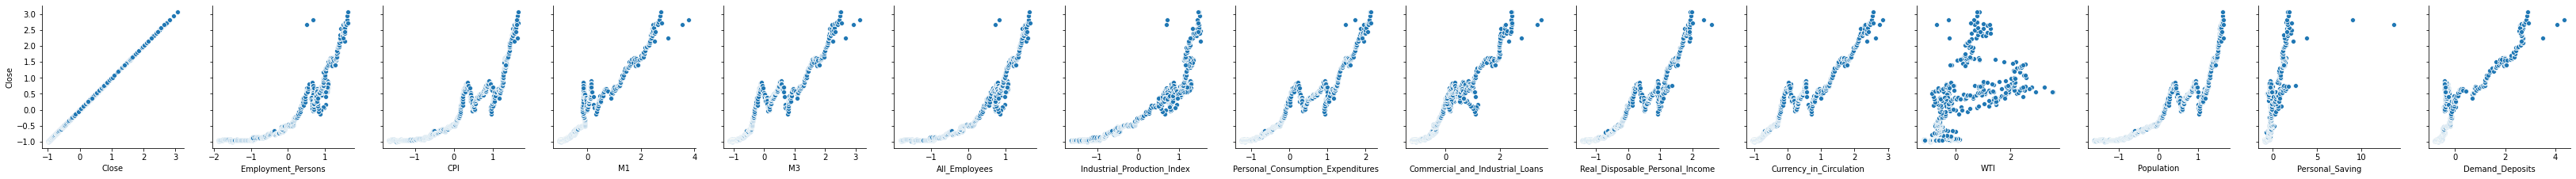

In [85]:
sns.pairplot(data=df1, x_vars=columns, y_vars = 'Close', height=3)

In [86]:
# for col in df1.columns:
#     plt.scatter(x = col, y = "Close", data=df1)
#     plt.xlabel(col)
#     plt.ylabel('Close')
#     plt.show()

## Model Number 0. Dummy model

In [87]:
X0, y0 = df1.drop(columns = ['Close']).values, df1['Close'].values

In [88]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size = 0.3, random_state = 20)

In [89]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train0, y_train0)
y_pred0 = dummy_regr.predict(x_test0)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
r2_score0 = r2_score(y_test0, y_pred0)
rmse0 = (np.sqrt(mean_squared_error(y_test0, y_pred0)))
mse0 = mean_squared_error(y_test0, y_pred0)

In [92]:
print(f" R2 Score is {round(r2_score0 * 100,4)} %")
print(f" Root mean square error is {round(rmse0,4)}")
print(f" Mean square error is {round(mse0,4)}")

 R2 Score is -0.8455 %
 Root mean square error is 0.983
 Mean square error is 0.9663


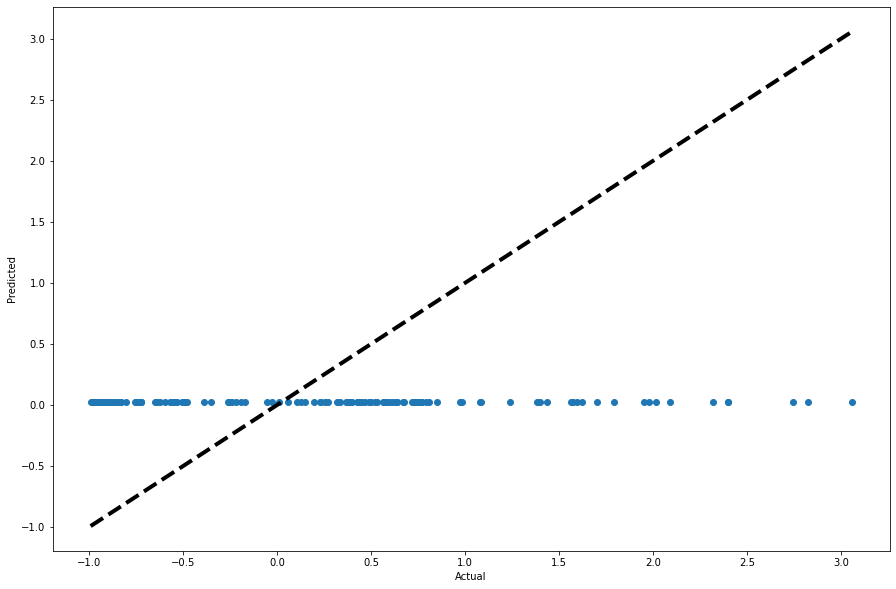

In [93]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(y_test0, y_pred0)
ax.plot([y_test0.min(), y_test0.max()], [y_test0.min(), y_test0.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

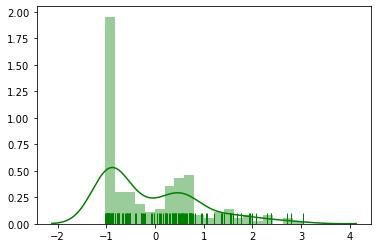

In [94]:
sns.distplot(y_test0 - y_pred0, 
             bins=20, 
             kde=True, 
             rug=True, 
             color='green')

## Model Number 1 Basic model

In [95]:
X1, y1 = df1.drop(columns = ['Close']), df1['Close']

In [96]:
model1 = sm.OLS(y1, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3302.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                        0.00
Time:                        13:44:50   Log-Likelihood:                          464.12
No. Observations:                 605   AIC:                                     -900.2
Df Residuals:                     591   BIC:                                     -838.6
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Employment_Persons                   -1.4904      0.178     -8.376      0.000      -1.840      -1.141
CPI                                   1.4002      0.180      7.765      0.000       1.046       1.754
M1                                    0.3235      0.144      2.242      0.025       0.040       0.607
M3                                   -1.3532      0.164     -8.266      0.000      -1.675      -1.032
All_Employees                         0.9527      0.201      4.747      0.000       0.559       1.347
Industrial_Production_Index           0.6711      0.076      8.872      0.000       0.523       0.820
Personal_Consumption_Expenditures    -1.1652      0.292     -3.991      0.000      -1.739      -0.592
Commercial_and_Industrial_Loans       0.4549      0.051      8.949      0.000       0.355       0.555
Real_Disposable_Personal_Income       2.0766      0.313      6.634      0.000       1.462       2.691
Currency_in_Circulation               1.3912      0.164      8.497      0.000       1.070       1.713
WTI                                   0.0391      0.018      2.138      0.033       0.003       0.075
Population                           -2.2818      0.179    -12.742      0.000      -2.634      -1.930
Personal_Saving                      -0.2547      0.040     -6.396      0.000      -0.333      -0.177
Demand_Deposits                       0.2030      0.089      2.293      0.022       0.029       0.377
==============================================================================
Omnibus:                       11.340   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.434
Skew:                          -0.127   Prob(JB):                     0.000164
Kurtosis:                       3.792   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
y_pred1 = model1.predict()

In [98]:
from statsmodels.tools.eval_measures import rmse, mse
r2_score1 = r2_score(y1, y_pred1)
rmse1 = rmse(y1, y_pred1)
mse1 = mse(y1, y_pred1)

In [99]:
print(f" R2 Score is {round(r2_score1 * 100,4)} %")
print(f" Root mean square error is {round(rmse1,4)}")
print(f" Mean square error is {round(mse1,4)}")

 R2 Score is 98.7376 %
 Root mean square error is 0.1124
 Mean square error is 0.0126


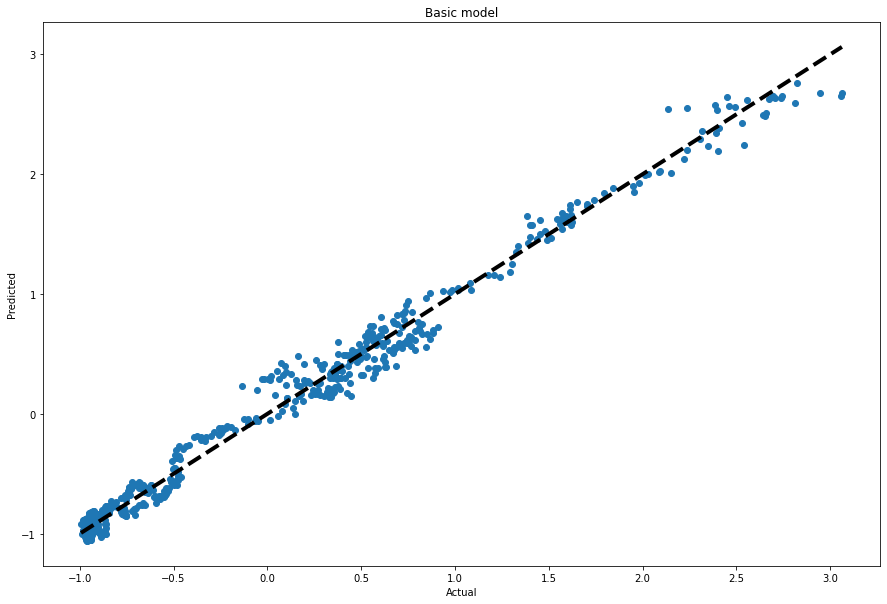

In [137]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(y1, y_pred1)
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Basic model')
plt.show()

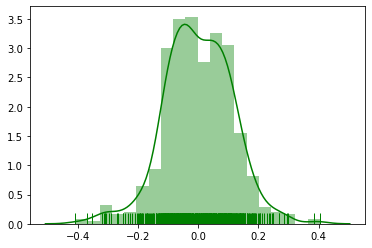

In [101]:
sns.distplot(model1.resid, 
             bins=20, 
             kde=True, 
             rug=True, 
             color='green')

## Model Number 2 Machine learning (sklearn)

In [102]:
X2, y2 = df1.drop(columns = ['Close']).values, df1['Close'].values

In [103]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 20)

In [104]:
for x in (x_train2, x_test2, y_train2, y_test2):
    print(x.shape)

(423, 14)
(182, 14)
(423,)
(182,)


In [106]:
model2 = LinearRegression().fit(x_train2, y_train2)

In [107]:
y_pred2 = model2.predict(x_test2)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [109]:
r2_score2 = r2_score(y_test2, y_pred2)
rmse2 = (np.sqrt(mean_squared_error(y_test2, y_pred2)))
mse2 = mean_squared_error(y_test2, y_pred2)

In [110]:
print(f" R2 Score is {round(r2_score2 * 100,4)} %")
print(f" Root mean square error is {round(rmse2,4)}")
print(f" Mean square error is {round(mse2,4)}")

 R2 Score is 98.7999 %
 Root mean square error is 0.1072
 Mean square error is 0.0115


In [111]:
#  R2 Score is 98.7376 %
#  Root mean square error is 0.1124
#  Mean square error is 0.0126

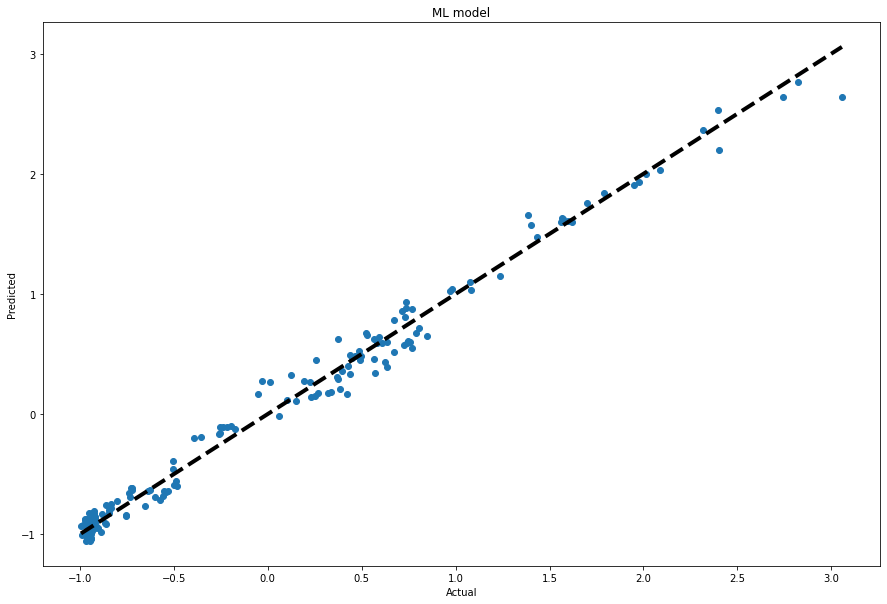

In [135]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(y_test2, y_pred2)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('ML model')
plt.show()

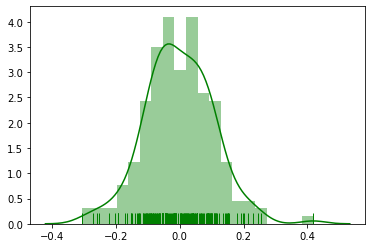

In [113]:
sns.distplot(y_test2 - y_pred2, 
             bins=20, 
             kde=True, 
             rug=True, 
             color='green')

## Model Number 3 Deep learning (keras)

In [114]:
from tensorflow.keras import backend as K

In [115]:
def determination_coefficient(y_true, y_pred):
   
    # https://en.wikipedia.org/wiki/Coefficient_of_determination
   
    y_bar = K.mean(y_true)
    SStot = K.sum(K.square(y_true-y_bar))
    SSreg = K.sum(K.square(y_true-y_pred))
    R2 = 1 - SSreg/SStot

    return R2

In [116]:
X3, y3 = df1.drop(columns = ['Close']).values, df1['Close'].values

In [117]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3, random_state = 20)

In [118]:
# n_features = len(X3.columns)
# n_features

In [119]:
model3 = Sequential(name='model')
model3.add(keras.Input(shape=14, name='input_layer'))
model3.add(keras.layers.Dense(512, activation='relu', name='inner_layer_1'))
# model3.add(keras.layers.Dense(256, activation='relu'))
# model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(Dense(1, name='output_layer'))

In [120]:
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inner_layer_1 (Dense)        (None, 512)               7680      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


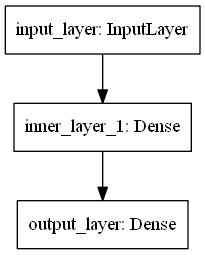

In [121]:
keras.utils.plot_model(model3)

In [122]:
model3.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mse',determination_coefficient]) 

In [123]:
model3.fit(x_train3, y_train3, 
          batch_size=50, 
          epochs=30, 
          verbose=1)

Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 0.4934 - mse: 0.4934 - determination_coefficient: 0.5923
Epoch 2/30
9/9 [==============================] - 0s 887us/step - loss: 0.1724 - mse: 0.1724 - determination_coefficient: 0.8104
Epoch 3/30
9/9 [==============================] - 0s 997us/step - loss: 0.0776 - mse: 0.0776 - determination_coefficient: 0.9141
Epoch 4/30
9/9 [==============================] - 0s 994us/step - loss: 0.0687 - mse: 0.0687 - determination_coefficient: 0.9329
Epoch 5/30
9/9 [==============================] - 0s 886us/step - loss: 0.0414 - mse: 0.0414 - determination_coefficient: 0.9549
Epoch 6/30
9/9 [==============================] - 0s 776us/step - loss: 0.0378 - mse: 0.0378 - determination_coefficient: 0.9631
Epoch 7/30
9/9 [==============================] - 0s 887us/step - loss: 0.0337 - mse: 0.0337 - determination_coefficient: 0.9665
Epoch 8/30
9/9 [==============================] - 0s 887us/step - loss: 0.0311 - mse: 0.0311 - dete

In [124]:
model3.evaluate(x_test3, y_test3)

6/6 [==============================] - 0s 499us/step - loss: 0.0091 - mse: 0.0091 - determination_coefficient: 0.9889


[0.009119133464992046, 0.009119133464992046, 0.9888723492622375]

In [125]:
y_pred3 = model3.predict(x_test3)

In [126]:
r2_score3 = r2_score(y_test3, y_pred3)
rmse3 = (np.sqrt(mean_squared_error(y_test3, y_pred3)))
mse3 = mean_squared_error(y_test3, y_pred3)

In [127]:
print(f" R2 Score is {round(r2_score3 * 100,4)} %")
print(f" Root mean square error is {round(rmse3,4)}")
print(f" Mean square error is {round(mse3,4)}")

 R2 Score is 99.0483 %
 Root mean square error is 0.0955
 Mean square error is 0.0091


In [128]:
#  R2 Score is 98.7591 %
#  Root mean square error is 0.109
#  Mean square error is 0.0119

#  R2 Score is 98.7999 %
#  Root mean square error is 0.1072
#  Mean square error is 0.0115

#  R2 Score is 98.7376 %
#  Root mean square error is 0.1124
#  Mean square error is 0.0126


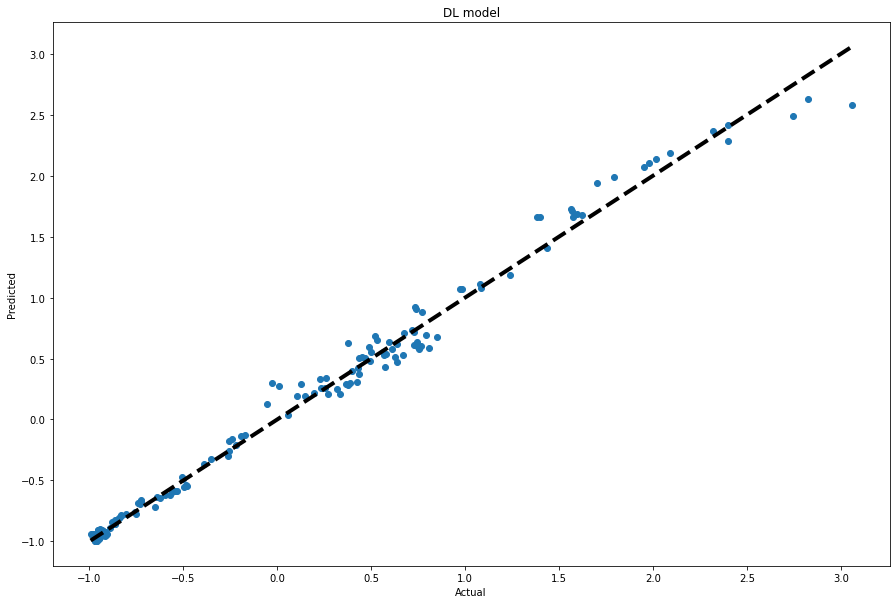

In [136]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(y_test3, y_pred3)
ax.plot([y_test3.min(), y_test3.max()], [y_test3.min(), y_test3.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('DL model')
plt.show()

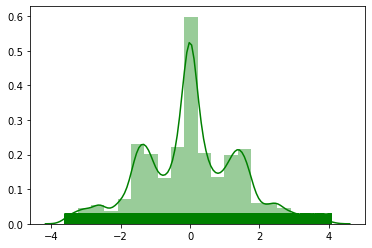

In [130]:
sns.distplot(y_test3 - y_pred3, 
             bins=20, 
             kde=True, 
             rug=True, 
             color='green')